In [1]:
import os 
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import tarfile
# from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import torchvision.models as models
import pickle
from easydict import EasyDict as edict
import numpy as np


In [2]:
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 '503_dropout.ipynb',
 '504_batch_normalization.ipynb',
 'cifar-10-python.tar.gz',
 'convolutional_neural_network.ipynb',
 'data']

In [3]:
with tarfile.open('cifar-10-python.tar.gz') as tar:
    tar.extractall(path = './data')

In [4]:
data_dir = 'data/cifar-10-batches-py/'

print(os.listdir(data_dir))

['batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'readme.html', 'test_batch']


In [5]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dictionary = pickle.load(fo, encoding = 'latin1')
#         dictionary = pickle.load(fo)
    return edict(dictionary)

In [6]:
b1 = unpickle('data/cifar-10-batches-py/data_batch_1')
b1.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [7]:
b1.data

array([[ 59,  43,  50, ..., 140,  84,  72],
       [154, 126, 105, ..., 139, 142, 144],
       [255, 253, 253, ...,  83,  83,  84],
       ...,
       [ 71,  60,  74, ...,  68,  69,  68],
       [250, 254, 211, ..., 215, 255, 254],
       [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8)

In [8]:
np.array(b1.labels)

array([6, 9, 9, ..., 1, 1, 5])

In [9]:
import matplotlib.pyplot as plt

labels = b1.labels
data = b1.data

In [10]:
meta_data = unpickle('data/cifar-10-batches-py/batches.meta')
meta_data

{'num_cases_per_batch': 10000,
 'label_names': ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 'num_vis': 3072}

In [11]:
meta_data.keys()

dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])

In [12]:
label_names = meta_data.label_names
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [13]:
data[0].shape

(3072,)

In [14]:
data = torch.from_numpy(data)

In [15]:
def show_image(image, label):
    title = label_names[label] + f': {label}'
    plt.imshow(image.reshape(3, 32, 32).permute(1, 2, 0))
    plt.title(title);

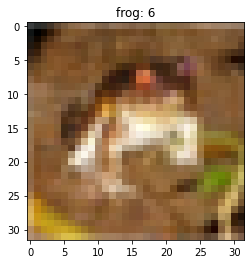

In [16]:
show_image(data[0], labels[0])

In [17]:
train_ds = data

In [18]:
train_ds = train_ds.reshape(len(train_ds), 3, 32, 32).permute(0, 2, 3, 1)
train_ds.shape

torch.Size([10000, 32, 32, 3])

In [19]:
rows = 10;cols = 10

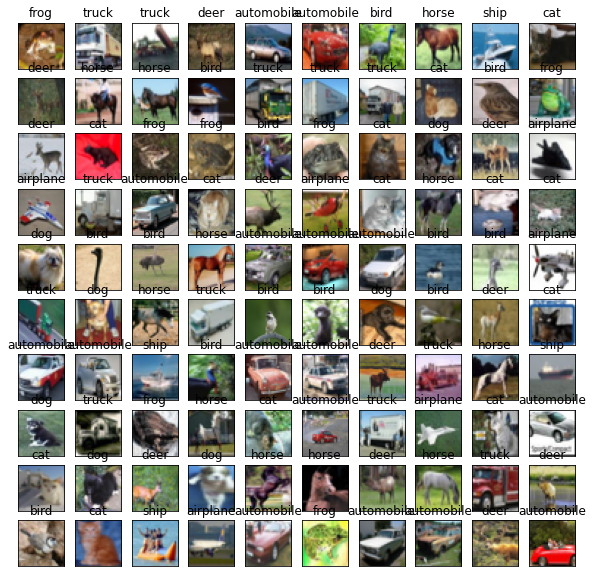

In [20]:
fig = plt.figure(figsize = (10, 10))

for i in range(len(train_ds)):
    fig.add_subplot(rows, cols, i + 1)
    plt.imshow(train_ds[i])
    plt.xticks([])
    plt.yticks([])
    plt.title(f'{label_names[labels[i]]}');
    if (i + 1) % 100 == 0: break

In [21]:
labels = torch.from_numpy(np.array(labels))

In [22]:
labels

tensor([6, 9, 9,  ..., 1, 1, 5], dtype=torch.int32)

In [23]:
os.listdir('./data/cifar-10-batches-py/')

['batches.meta',
 'data_batch_1',
 'data_batch_2',
 'data_batch_3',
 'data_batch_4',
 'data_batch_5',
 'readme.html',
 'test_batch']

In [24]:
dataset = []
labels = []

for i in range(1, 6):
    b_i = unpickle('./data/cifar-10-batches-py/data_batch_{}'.format(i))
    dataset.append(b_i.data)
    labels.append(b_i.labels)

In [25]:
np.array(dataset).shape

(5, 10000, 3072)

In [26]:
dataset = torch.from_numpy(np.array(dataset))
dataset = dataset.reshape(-1, 3, 32, 32)
# dataset = dataset.float()
dataset.shape

torch.Size([50000, 3, 32, 32])

In [27]:
labels = torch.from_numpy(np.array(labels))

labels = labels.reshape(50000)
labels

tensor([6, 9, 9,  ..., 9, 1, 1], dtype=torch.int32)

In [28]:
labels.shape

torch.Size([50000])

In [29]:
from torch.utils.data import Dataset
from torch.utils.data import TensorDataset

In [30]:
dataset = TensorDataset(dataset, labels)
dataset[0]

(tensor([[[ 59,  43,  50,  ..., 158, 152, 148],
          [ 16,   0,  18,  ..., 123, 119, 122],
          [ 25,  16,  49,  ..., 118, 120, 109],
          ...,
          [208, 201, 198,  ..., 160,  56,  53],
          [180, 173, 186,  ..., 184,  97,  83],
          [177, 168, 179,  ..., 216, 151, 123]],
 
         [[ 62,  46,  48,  ..., 132, 125, 124],
          [ 20,   0,   8,  ...,  88,  83,  87],
          [ 24,   7,  27,  ...,  84,  84,  73],
          ...,
          [170, 153, 161,  ..., 133,  31,  34],
          [139, 123, 144,  ..., 148,  62,  53],
          [144, 129, 142,  ..., 184, 118,  92]],
 
         [[ 63,  45,  43,  ..., 108, 102, 103],
          [ 20,   0,   0,  ...,  55,  50,  57],
          [ 21,   0,   8,  ...,  50,  50,  42],
          ...,
          [ 96,  34,  26,  ...,  70,   7,  20],
          [ 96,  42,  30,  ...,  94,  34,  34],
          [116,  94,  87,  ..., 140,  84,  72]]], dtype=torch.uint8),
 tensor(6, dtype=torch.int32))

In [31]:
image, label = dataset[100]
image.shape

torch.Size([3, 32, 32])

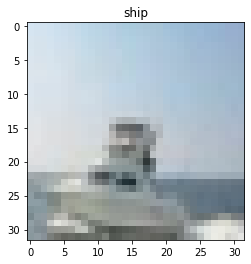

In [32]:
plt.imshow(image.permute(1, 2, 0))
plt.title(label_names[label]);

In [33]:
random_seed = 42

torch.manual_seed(random_seed)

In [34]:
validation_size = 10000

train_size = len(dataset) - validation_size

train_ds, validation_ds = random_split(dataset, [train_size, validation_size])
len(train_ds), len(validation_ds)

(40000, 10000)

In [35]:
from torch.utils.data import DataLoader

In [36]:
batch_size = 128

train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True, num_workers = 4, pin_memory = True)
validation_dl = DataLoader(validation_ds, batch_size * 2, num_workers = 4, pin_memory = True)

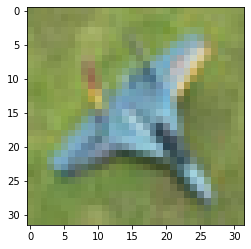

In [37]:
for images, labels in train_dl:
    plt.imshow(images[0].permute(1, 2, 0));
    break

In [38]:
from torchvision.utils import make_grid

In [39]:
def show_batch(loader):
    for images, labels in loader:
        fig, ax = plt.subplots(figsize = (12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0));
        break

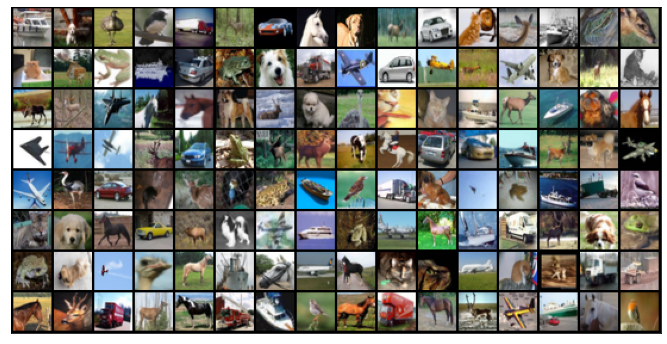

In [40]:
show_batch(train_dl)

In [41]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    
    else:
        return data.to(device, non_blocking = True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        
        for b in self.dl:
            yield to_device(b, self.device)
    
    def __len__(self):
        return len(self.dl)

In [42]:
device = get_default_device()
device

device(type='cuda')

In [43]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim = 1)
    return torch.tensor(torch.sum(torch.eq(preds, labels)).item() / len(preds))    

In [363]:
class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        images = images.float()
        labels = labels.type(torch.LongTensor)
        labels = labels.to(device)
        out = self(images)
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        images = images.float()
        labels = labels.type(torch.LongTensor)
        labels = labels.to(device)
        out = self(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        return dict(val_loss = loss, val_acc = acc)

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return dict(val_loss = epoch_loss.item(), val_acc = epoch_acc.item())

    def epoch_end(self, epoch, result):
        print(f"Epoch [{epoch + 1}], train_loss : {result['train_loss'] : .4f}, val_loss : {result['val_loss'] : .4f},\
                val_acc : {result['val_acc'] : .4f}")
        
    

In [479]:
def conv_block(in_channels, out_channels, pool = False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size = 3, padding = 1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace = True)]
    if pool:
        layers.append(nn.MaxPool2d(2))
    
    
    return nn.Sequential(*layers)

class ResNet10(ImageClassificationBase):
    def __init__(self, in_channels = 3, out_channels = 10, pool = False):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, True)
        self.conv4 = conv_block(256, 512, True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), nn.Flatten(), nn.Dropout(0.2), nn.Linear(512, out_channels))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        
        out = self.classifier(out)
        
        return out
        
        

In [480]:
model = to_device(ResNet10(3, 10), device)
model

ResNet10(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=T

In [481]:
# model = models.resnet18(pretrained = True)
# model

In [482]:
# def set_parameter_requires_grad(model, feature_extracting = True):
#     if feature_extracting:
#         for param in model.parameters():
#             param.requires_grad = False

# set_parameter_requires_grad(model)

In [483]:
# model.fc = nn.Linear(512, 10)

In [484]:
# list(model.parameters())

In [485]:
# for name, param in model.named_parameters():
#     if param.requires_grad:
#         print(name, param.data)

In [486]:
# params_to_update = []
# for name, param in model.named_parameters():
#     if param.requires_grad:
#         params_to_update.append(param)

In [487]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [488]:
# class CNN_Model(ImageClassificationBase):
#     def __init__(self):
#         super().__init__()
#         self.network = nn.Sequential(
#             nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
# #             nn.Dropout2d(0.1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(),
#             nn.Conv2d(32, 64, kernel_size = 3, stride = 1, padding = 1),
# #             nn.Dropout2d(0.1),
#             nn.BatchNorm2d(64),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),
            
#             nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
# #             nn.Dropout2d(0.2),
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.Conv2d(128, 128, kernel_size = 3, stride = 1, padding = 1),
#             nn.Dropout2d(0.2),
#             nn.BatchNorm2d(128),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),
            
#             nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
# #             nn.Dropout2d(0.4),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, kernel_size = 3, stride = 1, padding = 1),
# #             nn.Dropout2d(0.3),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),
            
#             nn.Conv2d(256,512, kernel_size = 3, stride = 1, padding = 1),
#             nn.BatchNorm2d(512),
#             nn.ReLU(),
#             nn.Conv2d(512, 512, kernel_size = 3, stride = 1, padding = 1),
#             nn.Dropout2d(0.3),
#             nn.BatchNorm2d(512),
#             nn.ReLU(),
#             nn.MaxPool2d(2, 2),
            
#             nn.Flatten(),
#             nn.Linear(512 * 2 * 2, 512),
#             nn.Dropout(0.5),
#             nn.ReLU(),
#             nn.Linear(512, 256),
#             nn.Dropout(0.5),
#             nn.ReLU(),
#             nn.Linear(256, 10))
        
#     def forward(self, xb):
#         return self.network(xb)

In [489]:
# model = CNN_Model()
# model

In [490]:
train_dl = DeviceDataLoader(train_dl, device)
validation_dl = DeviceDataLoader(validation_dl, device)
# to_device(model, device)

In [491]:
# @torch.no_grad()
# def evaluate(model, val_loader):
#     model.eval()
#     outputs = [model.validation_step(batch) for batch in val_loader]
#     return model.validation_epoch_end(outputs)

# def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
#     history = []
#     optimizer = opt_func(model.parameters(), lr)
#     for epoch in range(epochs):
#         model.train()
#         train_losses = []
#         for batch in train_loader:
#             loss = model.training_step(batch)
#             train_losses.append(loss)
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
        
#         result = evaluate(model, val_loader)
#         result['train_loss'] = torch.stack(train_losses).mean().item()
#         model.epoch_end(epoch, result)
#         history.append(result)
#     return history
        

In [492]:
# history = fit(num_of_epochs, lr, model, train_dl, validation_dl, opt_func = torch.optim.Adam)

In [493]:
# def training_step(model, batch):
#         images, labels = batch
#         images = images.float()
#         labels = labels.type(torch.LongTensor)
#         labels = labels.to(device)
#         out = model(images)
#         loss = F.cross_entropy(out, labels)
#         return loss
    
# def validation_step(model, batch):
#     images, labels = batch
#     images = images.float()
#     labels = labels.type(torch.LongTensor)
#     labels = labels.to(device)
#     out = model(images)
#     loss = F.cross_entropy(out, labels)
#     acc = accuracy(out, labels)
#     return dict(val_loss = loss, val_acc = acc)

# def validation_epoch_end(model, outputs):
#     batch_losses = [x['val_loss'] for x in outputs]
#     epoch_loss = torch.stack(batch_losses).mean()
#     batch_accs = [x['val_acc'] for x in outputs]
#     epoch_acc = torch.stack(batch_accs).mean()
#     return dict(val_loss = epoch_loss.item(), val_acc = epoch_acc.item())

# def epoch_end(model, epoch, result):
#     print(f"Epoch [{epoch + 1}], train_loss : {result['train_loss'] : .4f}, val_loss : {result['val_loss'] : .4f},\
#             val_acc : {result['val_acc'] : .4f}")

In [494]:
# def conv_block(in_channels, out_channels, pool = False):
    

In [495]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_cycle_once(epochs, max_lr, model, train_loader, validation_loader, grad_clip = None, weight_decay = 0, opt_func = torch.optim.Adam):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay = weight_decay)
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs = epochs, steps_per_epoch = len(train_loader))
    
    for epoch in range(epochs):
        model.train()
        train_losses = []
        lrs = []
        
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            if grad_clip:
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            lrs.append(get_lr(optimizer))
            sched.step()
        
        result = evaluate(model, validation_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history
        
        

In [496]:
# model = to_device(model, device)
# model

In [497]:
epochs = 20
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [498]:
history = [evaluate(model, validation_dl)]
history


[{'val_loss': 8.374872207641602, 'val_acc': 0.10615234076976776}]

In [499]:
%%time
history += fit_cycle_once(epochs, max_lr, model, train_dl, validation_dl, grad_clip, weight_decay, opt_func)


Epoch [1], train_loss :  1.4012, val_loss :  1.2667,                val_acc :  0.5755
Epoch [2], train_loss :  0.9434, val_loss :  1.1031,                val_acc :  0.6284
Epoch [3], train_loss :  0.8230, val_loss :  1.4879,                val_acc :  0.5903
Epoch [4], train_loss :  0.7404, val_loss :  0.9095,                val_acc :  0.6846
Epoch [5], train_loss :  0.6142, val_loss :  0.8806,                val_acc :  0.7145
Epoch [6], train_loss :  0.5520, val_loss :  0.9064,                val_acc :  0.7128
Epoch [7], train_loss :  0.5214, val_loss :  1.4533,                val_acc :  0.5869
Epoch [8], train_loss :  0.5052, val_loss :  1.0142,                val_acc :  0.6854
Epoch [9], train_loss :  0.4881, val_loss :  0.7438,                val_acc :  0.7463
Epoch [10], train_loss :  0.4694, val_loss :  0.6838,                val_acc :  0.7744
Epoch [11], train_loss :  0.4345, val_loss :  0.6276,                val_acc :  0.7916
Epoch [12], train_loss :  0.4030, val_loss :  0.5756

In [500]:
# list(model.parameters())

In [501]:
def plot_accuracy(history):
    accuracies = [x['val_acc'] for x in history]
#     plt.figure(figsize = (30, 15))
    plt.plot(accuracies, '-x')
    plt.xlabel('Num of Epochs')
    plt.ylabel('Accuracy Rate')
    plt.title('Accuracy vs. No. of Epochs');

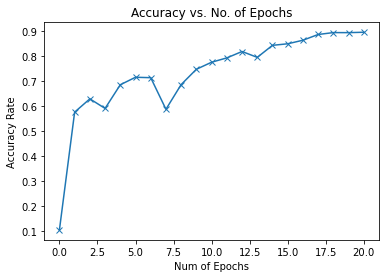

In [502]:
plot_accuracy(history)

In [503]:
def plot_loss(history):
    
    train_losses = [x.get('train_loss') for x in history]
    validation_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(validation_losses, '-r.')
    plt.xlabel('No. of Epochs')
    plt.ylabel('Loss Rate')
    plt.title('Loss vs. Epochs');

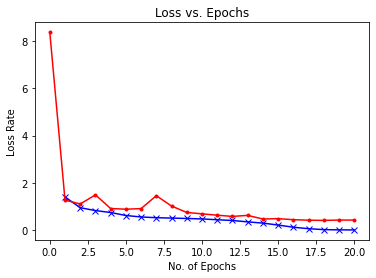

In [504]:
plot_loss(history)

In [505]:
test_batch = unpickle('./data/cifar-10-batches-py/test_batch')
test_batch.keys()

dict_keys(['batch_label', 'labels', 'data', 'filenames'])

In [506]:
test_data = test_batch.data
labels = test_batch.labels

In [507]:
test_data = torch.from_numpy(test_data.reshape(-1, 3, 32, 32))
test_data.shape

torch.Size([10000, 3, 32, 32])

In [508]:
labels = torch.from_numpy(np.array(labels))
labels.shape

torch.Size([10000])

In [509]:
test_ds = TensorDataset(test_data, labels)

In [510]:
test_dl = DeviceDataLoader(DataLoader(test_ds, batch_size * 2), device)
result = evaluate(model, test_dl)
print(f"Accuracy = {result['val_acc'] : .4f}, Loss = {result['val_loss'] : .4f}")

Accuracy =  0.8861, Loss =  0.4553


In [511]:
def predict_image(img, model):
    img = img.float()
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds = torch.max(yb, dim = 1)
    return label_names[preds[0].item()]

Label :  deer
Prediction :  deer


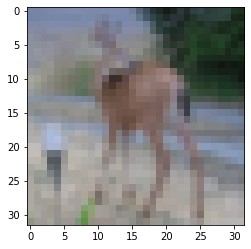

In [512]:
image, label = test_ds[100]
plt.imshow(image.permute(1, 2, 0));
print('Label : ', label_names[label])
print('Prediction : ', predict_image(image, model))